In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [56]:
def readData(dataset):
    pd.set_option('display.max_columns', None)
    data = pd.read_csv(dataset)
    return data

In [57]:
data = readData('house.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='count', ylabel='Heating'>

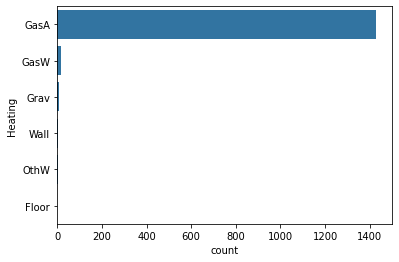

In [61]:
sns.countplot(data['Heating'])

<Axes: xlabel='Heating', ylabel='SalePrice'>

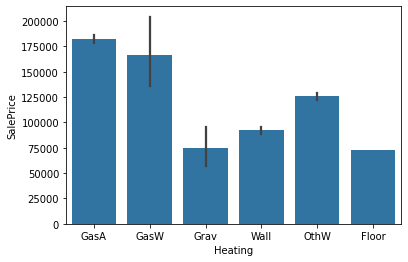

In [60]:
sns.barplot(data = data, x = 'Heating', y = 'SalePrice')

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data1 = data.iloc[:, :20]
data2 = data.iloc[:, 20:40]
data3 = data.iloc[:, 40:60]
data4 = data.iloc[:, 60:]

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   RoofStyle     1460 non-null   object 
 2   RoofMatl      1460 non-null   object 
 3   Exterior1st   1460 non-null   object 
 4   Exterior2nd   1460 non-null   object 
 5   MasVnrType    588 non-null    object 
 6   MasVnrArea    1452 non-null   float64
 7   ExterQual     1460 non-null   object 
 8   ExterCond     1460 non-null   object 
 9   Foundation    1460 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  BsmtCond      1423 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtFinSF1    1460 non-null   int64  
 15  BsmtFinType2  1422 non-null   object 
 16  BsmtFinSF2    1460 non-null   int64  
 17  BsmtUnfSF     1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HeatingQC     1460 non-null   object 
 1   CentralAir    1460 non-null   object 
 2   Electrical    1459 non-null   object 
 3   1stFlrSF      1460 non-null   int64  
 4   2ndFlrSF      1460 non-null   int64  
 5   LowQualFinSF  1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   BsmtFullBath  1460 non-null   int64  
 8   BsmtHalfBath  1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  HalfBath      1460 non-null   int64  
 11  BedroomAbvGr  1460 non-null   int64  
 12  KitchenAbvGr  1460 non-null   int64  
 13  KitchenQual   1460 non-null   object 
 14  TotRmsAbvGrd  1460 non-null   int64  
 15  Functional    1460 non-null   object 
 16  Fireplaces    1460 non-null   int64  
 17  FireplaceQu   770 non-null    object 
 18  GarageType    1379 non-null 

In [9]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageFinish   1379 non-null   object
 1   GarageCars     1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   GarageQual     1379 non-null   object
 4   GarageCond     1379 non-null   object
 5   PavedDrive     1460 non-null   object
 6   WoodDeckSF     1460 non-null   int64 
 7   OpenPorchSF    1460 non-null   int64 
 8   EnclosedPorch  1460 non-null   int64 
 9   3SsnPorch      1460 non-null   int64 
 10  ScreenPorch    1460 non-null   int64 
 11  PoolArea       1460 non-null   int64 
 12  PoolQC         7 non-null      object
 13  Fence          281 non-null    object
 14  MiscFeature    54 non-null     object
 15  MiscVal        1460 non-null   int64 
 16  MoSold         1460 non-null   int64 
 17  YrSold         1460 non-null   int64 
 18  SaleType       1460 non-null

### Removing null columns

In [10]:
data = data.drop(columns=['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
data['MSSubClass'].value_counts().sort_values

<bound method Series.sort_values of MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64>

In [13]:
data = data.dropna()

C:\Users\hi\AppData\Local\Temp\ipykernel_18384\1013267792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['MSSubClass'], palette='flare')


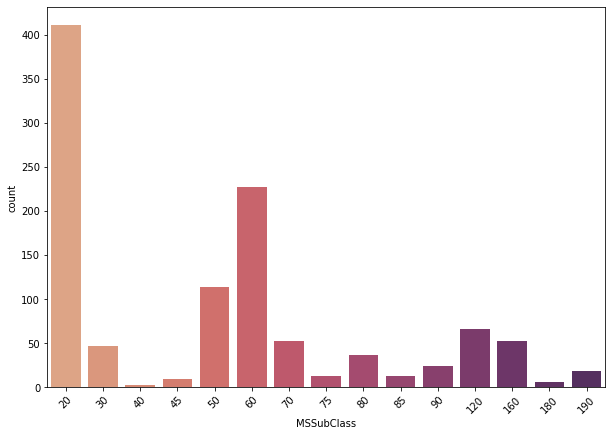

In [14]:
plt.figure(figsize=(10, 7))
sns.countplot(x=data['MSSubClass'], palette='flare')
plt.xticks(np.arange(0, 15), rotation=45)
plt.show()

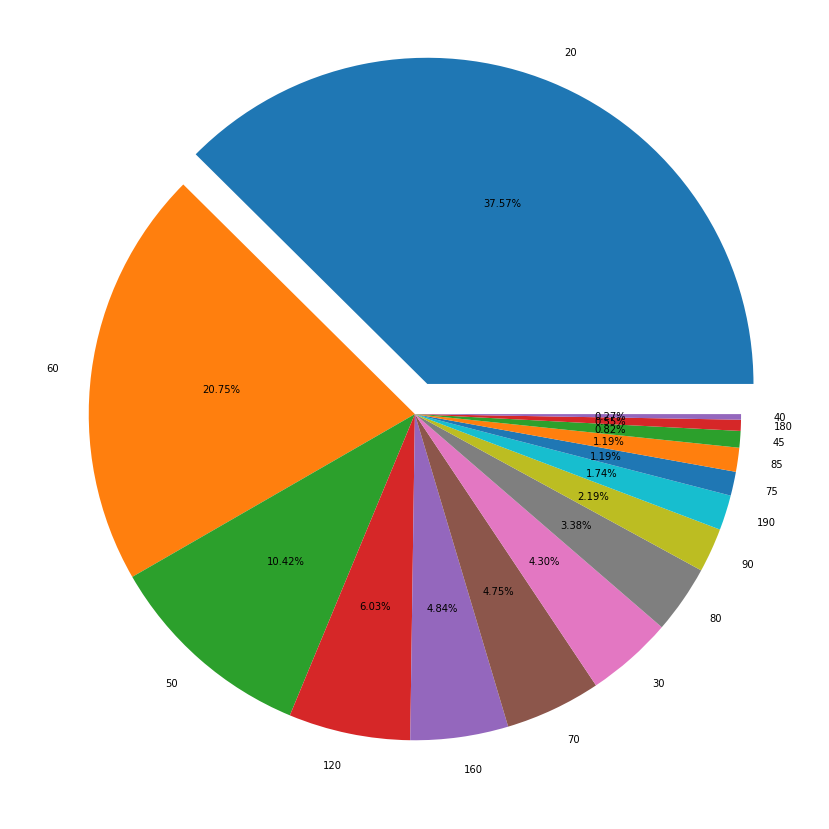

In [15]:
plt.figure(figsize=(20, 15))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(data['MSSubClass'].value_counts().values, labels=data['MSSubClass'].value_counts().index, autopct='%.2f%%', explode=explode)
plt.show()

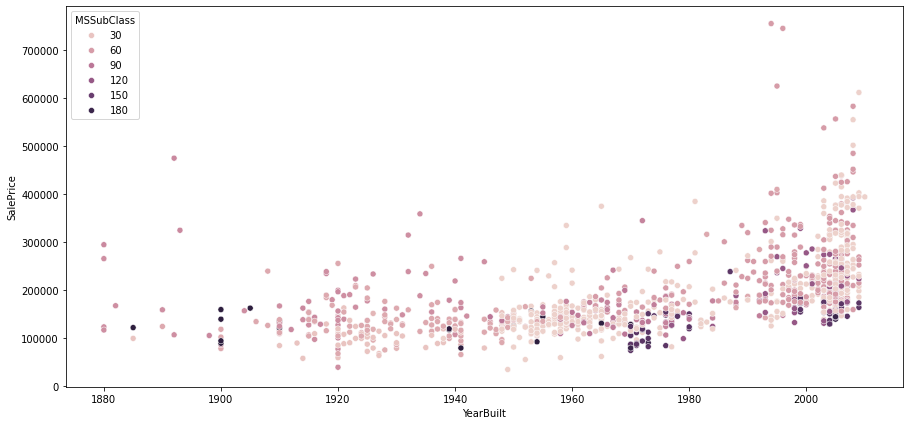

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data, hue='MSSubClass', ax=ax)
plt.show()

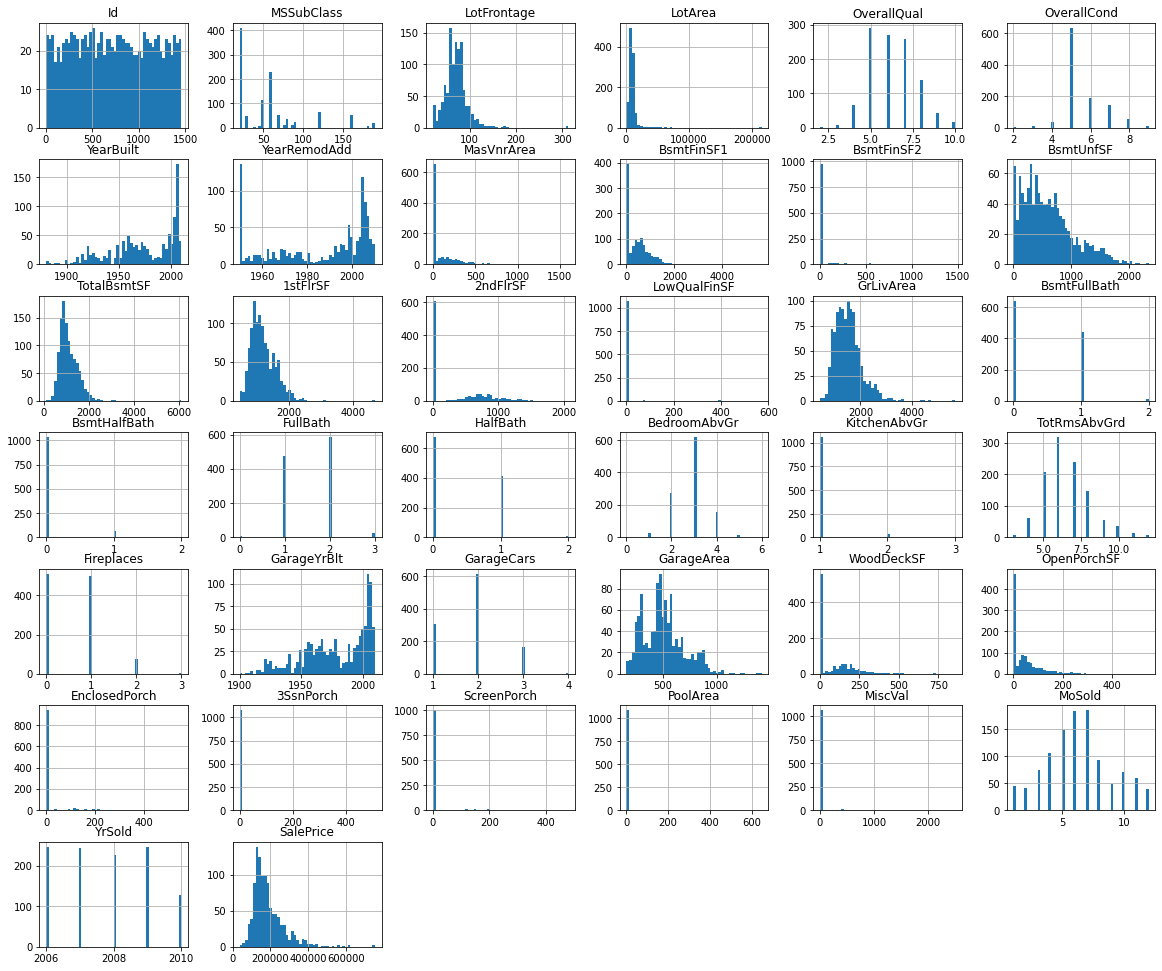

In [17]:
data.hist(figsize=(20, 17), bins=50)
plt.show()

In [18]:
data['HouseStyle'].value_counts().sort_values

<bound method Series.sort_values of HouseStyle
1Story    540
2Story    346
1.5Fin    117
SLvl       43
SFoyer     23
1.5Unf     10
2.5Unf      9
2.5Fin      6
Name: count, dtype: int64>

C:\Users\hi\AppData\Local\Temp\ipykernel_18384\989016138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['HouseStyle'], palette='flare')


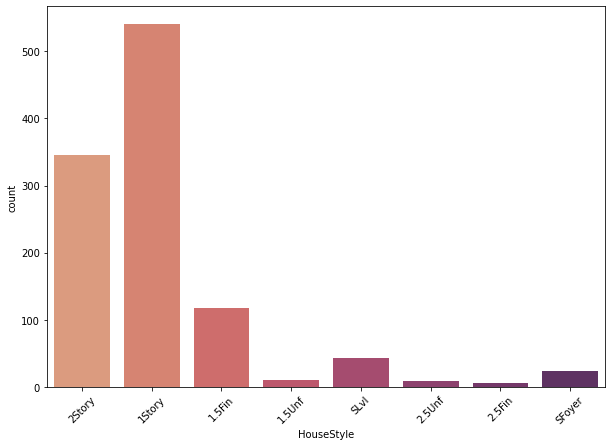

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(x=data['HouseStyle'], palette='flare')
plt.xticks(np.arange(0, 8), rotation=45)
plt.show()

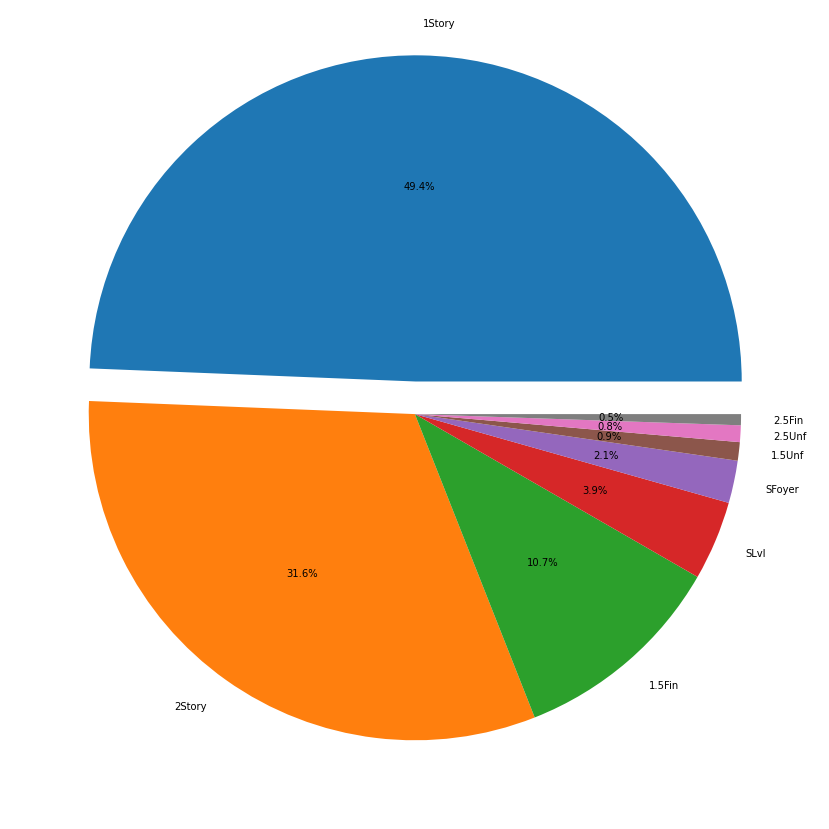

In [20]:
plt.figure(figsize=(20, 15))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
plt.pie(data['HouseStyle'].value_counts().values, labels=data['HouseStyle'].value_counts().index, autopct='%1.1f%%', explode=explode)
plt.show()

# Question1: 
### How does the overall quality (OverallQual) of a house relate to its sale price?

In [21]:
price_quality = data.loc[:, ['SalePrice', 'OverallQual']]
price_quality

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


In [22]:
price_quality.describe()

,SalePrice,OverallQual
count,1094.000000,1094.000000
mean,187033.263254,6.247715
std,83165.332151,1.366797
min,35311.000000,2.000000
25%,132500.000000,5.000000
50%,165750.000000,6.000000
75%,221000.000000,7.000000
max,755000.000000,10.000000


In [23]:
lowQuality = price_quality[price_quality['OverallQual'] <= 6]
highQuality = price_quality[price_quality['OverallQual'] > 6]
print(lowQuality.shape)
print(highQuality.shape)

(638, 2)
(456, 2)


In [24]:
alpha = 0.05 
stat, p_value = sp.ttest_ind(highQuality.SalePrice, lowQuality.SalePrice, equal_var=True, alternative='two-sided')
print(stat, p_value)

if p_value < alpha:
    print('Null hypothesis rejected')
else:
    print('Null hypothesis accepted')

29.06862047203087 4.5816043705477924e-138
Null hypothesis rejected


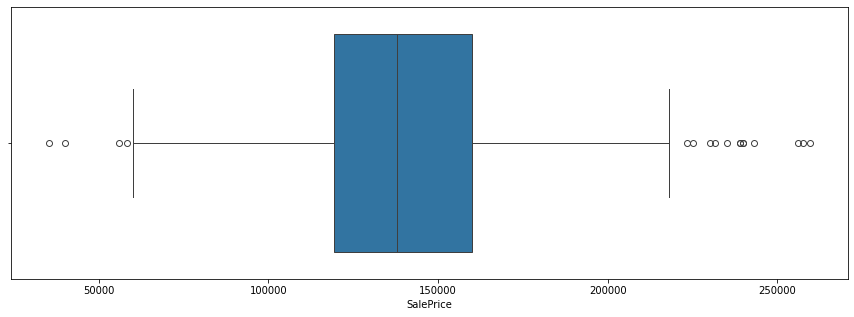

In [25]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=lowQuality['SalePrice'])
plt.show()

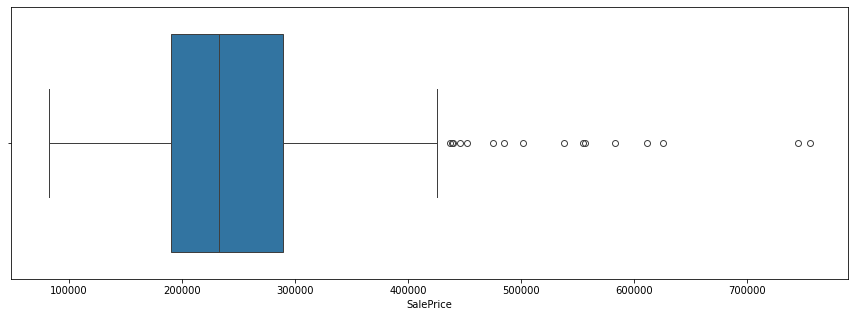

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=highQuality['SalePrice'])
plt.show()

In [27]:
highQuality_price = pd.DataFrame(data=np.array(highQuality['SalePrice']), columns=['highQuality'])
lowQuality_price = pd.DataFrame(data=np.array(lowQuality['SalePrice']), columns=['lowQuality'])

In [28]:
price = pd.concat([highQuality_price, lowQuality_price])

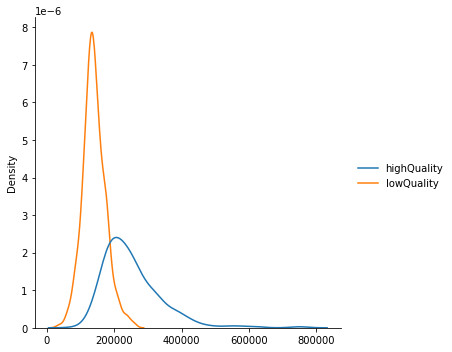

In [29]:
sns.displot(data=price, kind='kde')

# Question2: 
### How do the different types of heating (Heating) affect the sale prices?

In [30]:
data['Heating'].value_counts()

Heating
GasA    1075
GasW      16
Grav       2
OthW       1
Name: count, dtype: int64

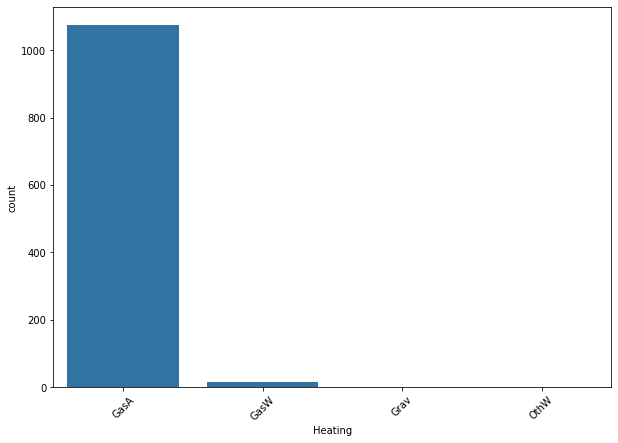

In [31]:
plt.figure(figsize=(10, 7))
sns.countplot(x=data['Heating'])
plt.xticks(np.arange(0, 4), rotation=45)
plt.show()

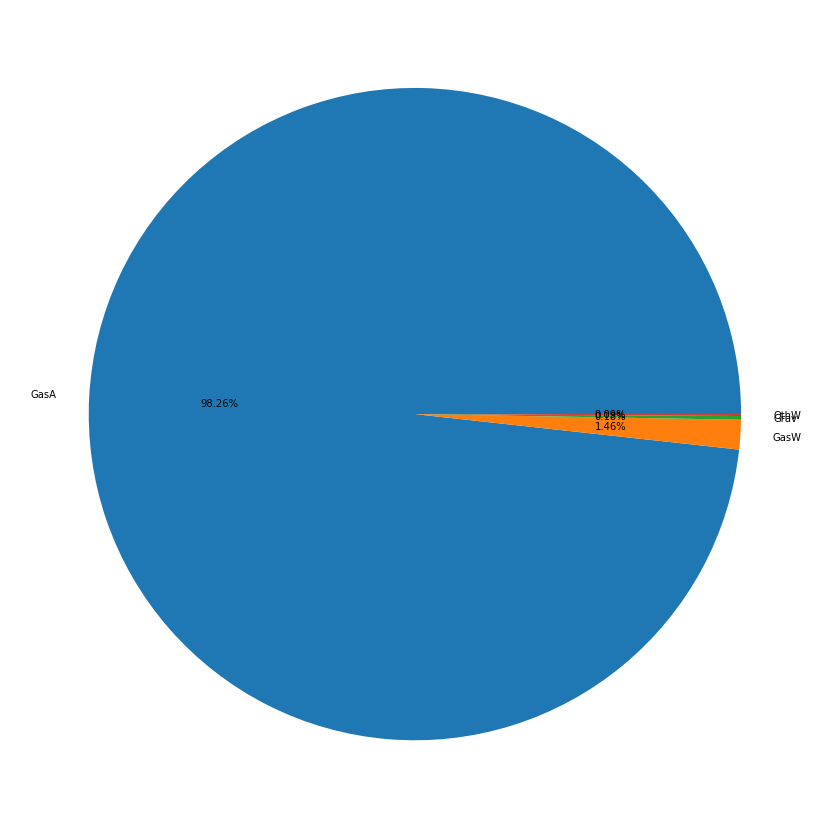

In [32]:
plt.figure(figsize=(20, 15))
plt.pie(data['Heating'].value_counts().values, labels=data['Heating'].value_counts().index, autopct='%.2f%%')
plt.show()

# Question3: 
### How do the different types of utilities (Utilities) available in a property relate to sale prices?

C:\Users\hi\AppData\Local\Temp\ipykernel_18384\689256950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Foundation'], palette='flare')


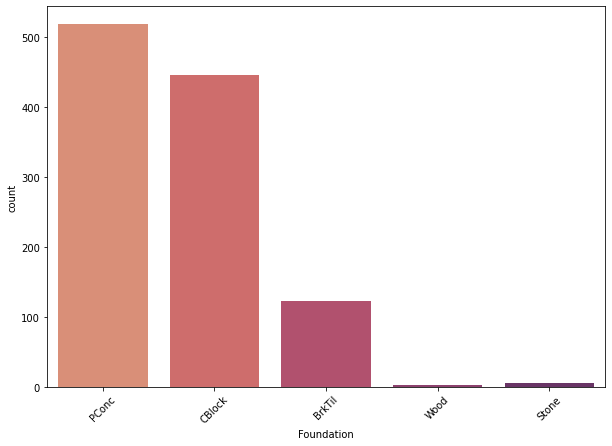

In [33]:
plt.figure(figsize=(10, 7))
sns.countplot(x=data['Foundation'], palette='flare')
plt.xticks(np.arange(0, 5), rotation=45)
plt.show()

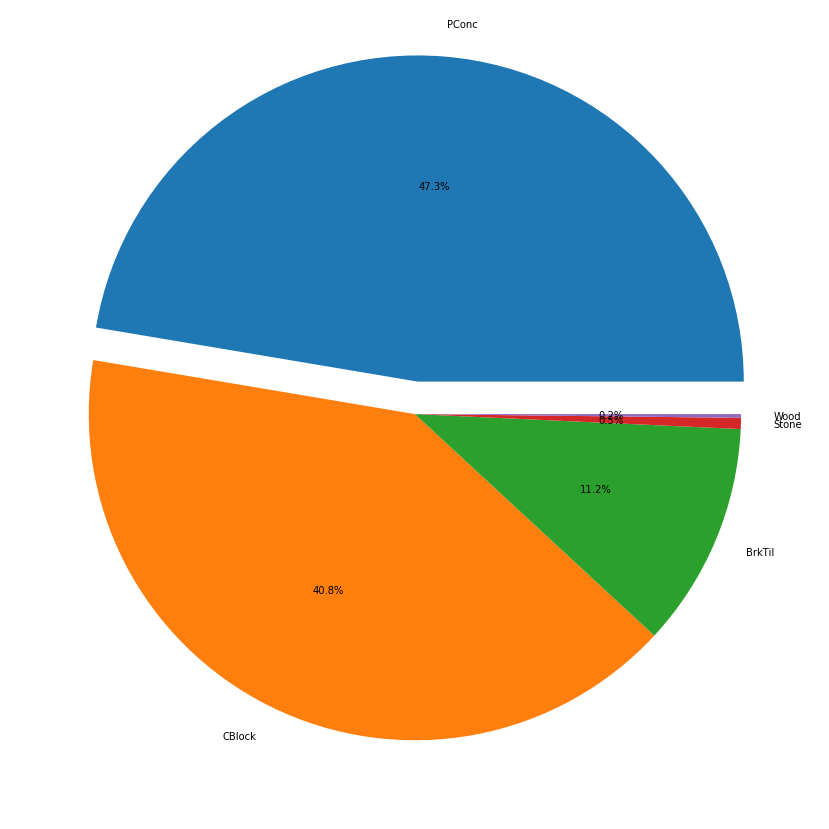

In [34]:
plt.figure(figsize=(20, 15))
explode = (0.1, 0, 0, 0, 0)
plt.pie(data['Foundation'].value_counts().values, labels=data['Foundation'].value_counts().index, autopct='%1.1f%%', explode=explode)
plt.show()

In [35]:
foundation_price = data.loc[:, ['Foundation', 'SalePrice']]
foundation_price

,Foundation,SalePrice
0,PConc,208500
1,CBlock,181500
2,PConc,223500
3,BrkTil,140000
4,PConc,250000
...,...,...
1455,PConc,175000
1456,CBlock,210000
1457,Stone,266500
1458,CBlock,142125


In [36]:
foundation_price['Foundation'].value_counts()

Foundation
PConc     518
CBlock    446
BrkTil    122
Stone       6
Wood        2
Name: count, dtype: int64

In [37]:
foundation_price = foundation_price[(foundation_price['Foundation'] != 'Wood') & (foundation_price['Foundation'] != 'Stone')]

In [38]:
foundation_price['Foundation'].value_counts()

Foundation
PConc     518
CBlock    446
BrkTil    122
Name: count, dtype: int64

In [39]:
PConc = foundation_price[foundation_price['Foundation'] == 'PConc']
CBlock = foundation_price[foundation_price['Foundation'] == 'CBlock']
BrkTil = foundation_price[foundation_price['Foundation'] == 'BrkTil']

In [40]:
alpha = 0.05 
stat, p_value = sp.f_oneway(PConc.SalePrice, CBlock.SalePrice, BrkTil.SalePrice)
print(stat, p_value)

if p_value < alpha:
    print('Null hypothesis rejected')
else:
    print('Null hypothesis accepted')

201.09442176005967 5.389276990944282e-75
Null hypothesis rejected


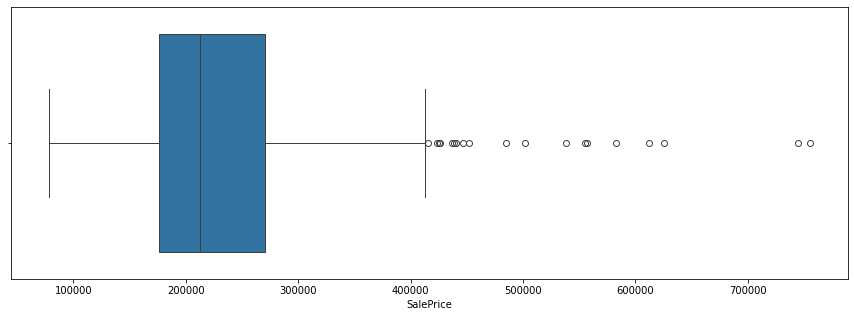

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=PConc['SalePrice'])
plt.show()

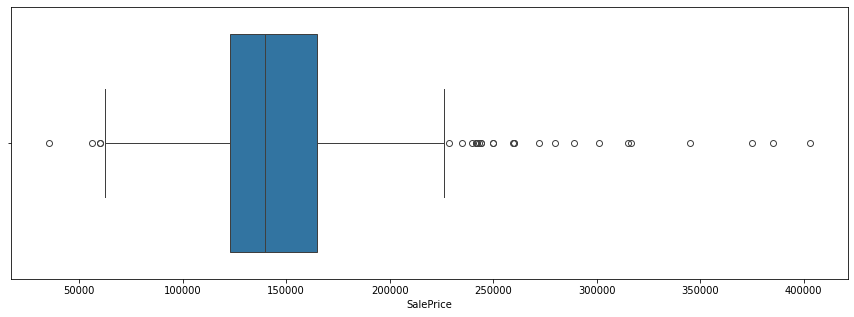

In [42]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=CBlock['SalePrice'])
plt.show()

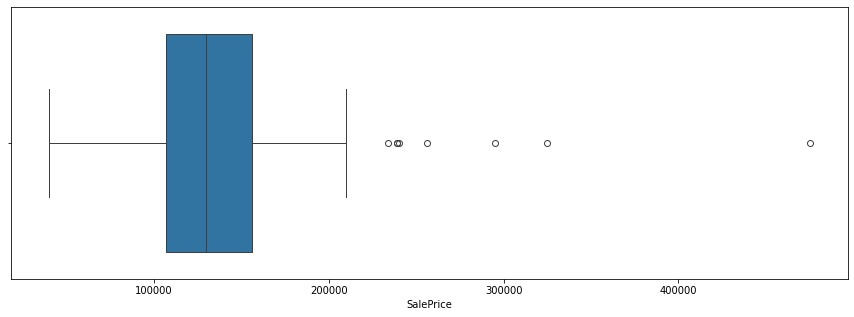

In [43]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=BrkTil['SalePrice'])
plt.show()

In [44]:
PConc_price = pd.DataFrame(data=np.array(PConc['SalePrice']), columns=['PConc'])
CBlock_price = pd.DataFrame(data=np.array(CBlock['SalePrice']), columns=['CBlock'])
BrkTil_price = pd.DataFrame(data=np.array(BrkTil['SalePrice']), columns=['BrkTil'])

In [45]:
price = pd.concat([PConc_price, CBlock_price, BrkTil_price])

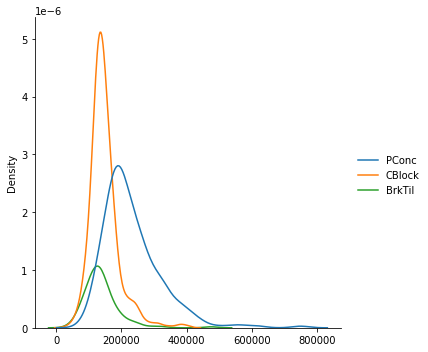

In [46]:
sns.displot(data=price, kind='kde')

# Question4:
### How does overall Quality relate to Year buily?

In [47]:
yearBuilt_quality = data.loc[:, ['YearBuilt', 'OverallQual']]
yearBuilt_quality

,YearBuilt,OverallQual
0,2003,7
1,1976,6
2,2001,7
3,1915,7
4,2000,8
...,...,...
1455,1999,6
1456,1978,6
1457,1941,7
1458,1950,5


In [48]:
old = yearBuilt_quality[yearBuilt_quality['YearBuilt'] < 1975]
new = yearBuilt_quality[yearBuilt_quality['YearBuilt'] >= 1975]

In [49]:
print(old.shape)
print(new.shape)

(545, 2)
(549, 2)


In [50]:
alpha = 0.05 
stat, p_value = sp.ttest_ind(old.OverallQual, new.OverallQual, equal_var=True, alternative='two-sided')
print(stat, p_value)

if p_value < alpha:
    print('Null hypothesis rejected')
else:
    print('Null hypothesis accepted')

-27.596504740908795 1.2952016217793759e-127
Null hypothesis rejected


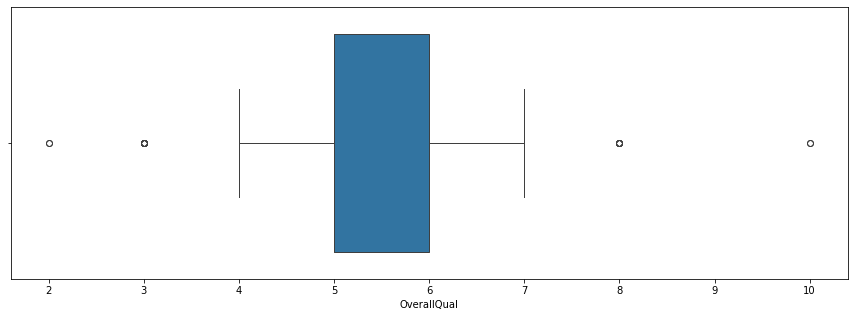

In [51]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=old['OverallQual'])
plt.show()

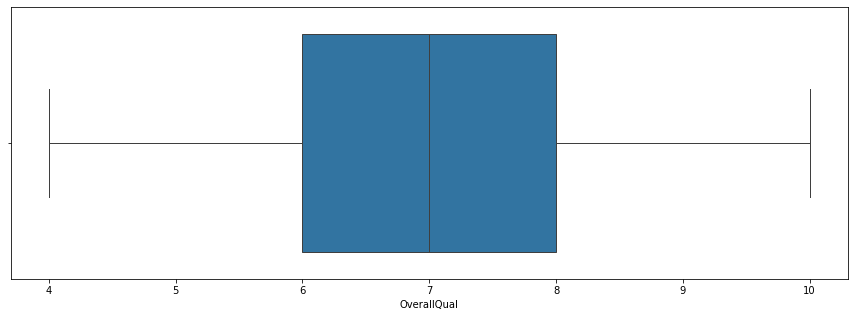

In [52]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=new['OverallQual'])
plt.show()

In [53]:
old_quality = pd.DataFrame(data=np.array(old['OverallQual']), columns=['old'])
new_quality = pd.DataFrame(data=np.array(new['OverallQual']), columns=['new'])

In [54]:
quality = pd.concat([old_quality, new_quality])

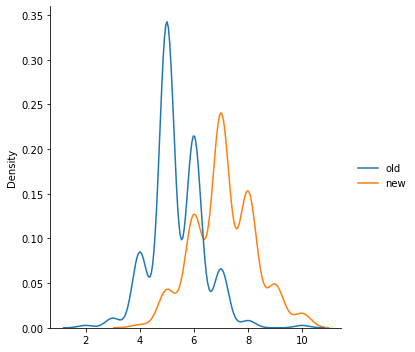

In [55]:
sns.displot(data=quality, kind='kde')